# Домашнее задание

In [106]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import math

In [70]:
data_house_prices = pd.read_excel('house_prices.xlsx', index_col=0)
#data_house_prices.head()

,Rooms,DistMetro,Area,Price
No,,,,
1,3,12,56,9396
2,2,4,54,9785
3,1,2,31,5783
4,2,8,48,9123
5,1,11,31,5662


**1. Построить гистограмму**
Постройте гистограммы распределения цен для каждой категории (по количеству комнат).
Какие выводы можно сделать на основе полученных гистограмм?

In [65]:
#1 ком. кв
data_house1_prices = data_house_prices [data_house_prices.Rooms == 1]
count_house1 = len(data_house1_prices) #выборка/кол-во 1 ком. кв.  
#2 ком. кв
data_house2_prices = data_house_prices [data_house_prices.Rooms == 2]
count_house2 = len(data_house2_prices) #выборка/кол-во 2 ком. кв.  
#3 ком. кв
data_house3_prices = data_house_prices [data_house_prices.Rooms == 3]
count_house3 = len(data_house3_prices) #выборка/кол-во 3 ком. кв.  

In [46]:
#распределение кол-ва 1 ком. кв по цене 
distr_house1_prices = data_house1_prices['Price'].value_counts().reset_index()
distr_house1_prices.rename(columns={'index': 'Price', 'Price': 'Frequency'}, inplace=True)
#распределение кол-ва 2 ком. кв по цене 
distr_house2_prices = data_house2_prices['Price'].value_counts().reset_index()
distr_house2_prices.rename(columns={'index': 'Price', 'Price': 'Frequency'}, inplace=True)
#распределение кол-ва 2 ком. кв по цене 
distr_house3_prices = data_house3_prices['Price'].value_counts().reset_index()
distr_house3_prices.rename(columns={'index': 'Price', 'Price': 'Frequency'}, inplace=True)

In [85]:
print(f'кол-во 1 ком. кв. = {count_house1}')
print(f'кол-во 2 ком. кв. = {count_house2}')  
print(f'кол-во 3 ком. кв. = {count_house3}')  
print(f'всего кв. = {count_house1 + count_house2 + count_house3}')  

кол-во 1 ком. кв. = 1657
кол-во 2 ком. кв. = 1690
кол-во 3 ком. кв. = 1653
всего кв. = 5000


In [64]:
#основные статистики для датафрейма 1 ком. кв
distr_house1_prices.describe()

,Price,Frequency
count,1297.000000,1297.000000
mean,5368.787201,1.277564
std,942.824663,0.577402
min,2825.000000,1.000000
25%,4690.000000,1.000000
50%,5328.000000,1.000000
75%,6031.000000,1.000000
max,8341.000000,5.000000


In [55]:
#основные статистики для датафрейма 2 ком. кв
distr_house2_prices.describe()

,Price,Frequency
count,1437.000000,1437.000000
mean,8546.304802,1.176061
std,1415.009460,0.440354
min,4427.000000,1.000000
25%,7458.000000,1.000000
50%,8536.000000,1.000000
75%,9563.000000,1.000000
max,12833.000000,4.000000


In [56]:
#основные статистики для датафрейма 3 ком. кв
distr_house3_prices.describe()

,Price,Frequency
count,1460.000000,1460.000000
mean,11764.063014,1.132192
std,2019.207131,0.367910
min,6338.000000,1.000000
25%,10250.500000,1.000000
50%,11671.500000,1.000000
75%,13189.000000,1.000000
max,17614.000000,3.000000


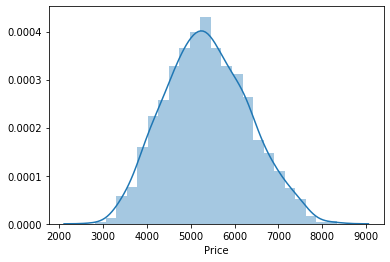

In [51]:
#гистограммы распределения цен на 1 ком. кв.
sns_plot1 = sns.distplot(distr_house1_prices['Price'])
fig = sns_plot1.get_figure()

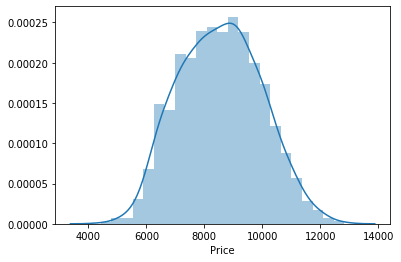

In [52]:
#гистограммы распределения цен на 2 ком. кв.
sns_plot2 = sns.distplot(distr_house2_prices['Price'])
fig = sns_plot2.get_figure()

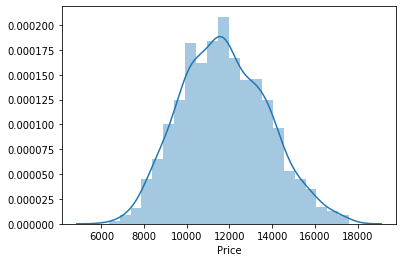

In [53]:
#гистограммы распределения цен на 3 ком. кв.
sns_plot3 = sns.distplot(distr_house3_prices['Price'])
fig = sns_plot3.get_figure()

**Анализ**

Гистограмма для однокомнатных квартир:
* Выборка = кол-во 1 ком. кв. = 1657
* Размах вариации (max - min) = 5516
* Среднее значение (mean) = 5368.79
* Стандартное отклонение (std) = 942.83

Гистограмма для двухкомнатных квартир:			
* Выборка = кол-во 2 ком. кв. = 1690
* Размах вариации (max - min) = 8406
* Среднее значение (mean) = 8546.30
* Стандартное отклонение (std) = 1415.00	

Гистограмма для трехкомнатных квартир:			
* Выборка = кол-во 3 ком. кв. = 1653
* Размах вариации (max - min) = 11276	
* Среднее значение (mean) = 11764.06
* Стандартное отклонение (std) = 2019.21		

Гистограммы распределения цен на 1, 2, 3 ком. квартиры визуально похожи на нормальное распределение.
Гистограмма распределения цен на 1 ком. квартиры визуально симметрична,
а гисторгамм распределения цен на 2,3 ком. квартиры визуально обладают левой ассиметрией.

Если сравнить относительною частоту, то больше всех у 1 ком. кв, затем 2 ком. кв. и 3 ком., то есть выбор 1 ком. кв. из средней ценовой категории больше остальных.

Стандартное отклонение растет в зависимости от кол-ва комнат, то есть чем больше комнат, тем больше цена.

**2. Оценить корреляцию**
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории
(по количеству комнат). Какие выводы можно сделать из этой оценки?

In [73]:
#расчет корреляции между Ценой и Площадью кв.
corr_P_house1 = pearsonr(data_house1_prices['Price'], data_house1_prices['Area'])[0]
corr_P_house2 = pearsonr(data_house2_prices['Price'], data_house2_prices['Area'])[0]
corr_P_house3 = pearsonr(data_house3_prices['Price'], data_house3_prices['Area'])[0]
print(f'Корреляция цены и площади 1 ком. квартир = {corr_P_house1} (средняя)')
print(f'Корреляция цены и площади 2 ком. квартир = {corr_P_house2} (сильная)')
print(f'Корреляция цены и площади 3 ком. квартир = {corr_P_house3} (сильная)')

Корреляция цены и площади 1 ком. квартир = 0.6528312289899489
Корреляция цены и площади 2 ком. квартир = 0.7058155230162516
Корреляция цены и площади 3 ком. квартир = 0.7447234199703179


**Анализ**
Так как корреляция 1 ком. кв. от 0, 5 до 0,7, то считается средней.
Корреляция 2, 3 ком. кв. от 0,7 до 0, 9, то - высокая/сильная.

Значит цены на 2, 3 кв-ры имею сильную взаимосвязь с площадью (чем больше площадь, тем выше цена). А 1 ком. кв. менее зависят от площади квартиры.

**3. Рассчитать квартили**
Рассчитайте границы квартилей распределения цен на 2х квартиры площадью более 40 кв. метров.

In [79]:
data_house2_40m = data_house2_prices[ data_house2_prices.Area > 40]
count_house2_40m = len(data_house2_40m)
print(f'Выборка 2 ком. квартир площадью более 40 кв. метров = {count_house2_40m}')
data_house2_40m.describe()

Выборка 2 ком. квартир площадью более 40 кв. метров = 1446


,Rooms,DistMetro,Area,Price
count,1446.0,1446.000000,1446.000000,1446.000000
mean,2.0,9.495851,49.090595,8809.825035
std,0.0,5.699237,5.067239,1268.013211
min,2.0,0.000000,41.000000,4427.000000
25%,2.0,5.000000,45.000000,7924.000000
50%,2.0,9.000000,49.000000,8812.000000
75%,2.0,14.000000,53.000000,9684.500000
max,2.0,19.000000,59.000000,12833.000000


**Анализ**

* Выборка 2 ком. квартир площадью более 40 кв. метров. = 1446
* Среднее значение (mean) = 8809.82
* Минимум (min) = 4427
* Первый квартиль /ниж. (25%) = 7924
* Второй квартиль (50%) = 8812
* Третий квартиль (75%) = 9684.5
* Максимум /верх. = 12833

**4. Решить задачу**
Вы являетесь риелтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.
В каждой категории разная степень корреляции. Т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

In [80]:
data_house3_prices.head()

,Rooms,DistMetro,Area,Price
No,,,,
1,3,12,56,9396
6,3,19,65,11318
7,3,13,69,11301
9,3,3,68,13279
11,3,18,63,11653


In [81]:
#основные статистики для датафрейма 3 ком. кв
data_house3_prices.describe()

,Rooms,DistMetro,Area,Price
count,1653.0,1653.000000,1653.000000,1653.000000
mean,3.0,9.689655,67.093164,11749.978221
std,0.0,5.795015,8.944260,1959.611884
min,3.0,0.000000,51.000000,6338.000000
25%,3.0,5.000000,59.000000,10320.000000
50%,3.0,10.000000,67.000000,11639.000000
75%,3.0,15.000000,75.000000,13123.000000
max,3.0,19.000000,83.000000,17614.000000


In [82]:
print(f'Выборка 3 ком. квартир = {count_house3}')

Выборка 3 ком. квартир = 1653


In [89]:
print(f'Среднее знач. выборки 3 ком. квартир = {data_house3_prices.Price.sum()/count_house3}')

Среднее знач. выборки 3 ком. квартир = 11749.978221415608


In [91]:
#прибыль - это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры)
percent = ((data_house3_prices.Price.sum()/count_house3) * 3) / 100
print(f'3% от Среднее знач. выборки 3 ком. квартир = {percent}')

3% от Среднее знач. выборки 3 ком. квартир = 352.49934664246825


In [120]:
#расчет Среднеквадратическое отклонение выборки
data_house3_prices['difference'] = data_house3_prices['Price'] - (data_house3_prices.Price.sum()/count_house3)
data_house3_prices['square'] = (data_house3_prices['Price'] - (data_house3_prices.Price.sum()/count_house3)) ** 2
var_sum = data_house3_prices['square'].sum()
var_ss = math.sqrt(data_house3_prices['square'].sum()/count_house3)
print(f'Среднеквадратическое отклонение выборки = {var_ss}')

Среднеквадратическое отклонение выборки = 1959.0190504890581


In [121]:
#3% от Среднеквадратическое отклонение выборки
print(f'3% от Среднеквадратическое отклонение выборки = {var_ss*3/100}')

3% от Среднеквадратическое отклонение выборки = 58.770571514671744


In [127]:
n = 25 #наблюдений
#расчет Стандартная ошибка среднего
var_SEM = (var_ss*3/100)/math.sqrt(n)
var_SEM

11.75411430293435

In [134]:
#9 млн. 200 тыс. в единицах измерения датасета = 9200, крит. значение 9200/25
#z-оценка (эмпир. значение)
((9200/25 - percent)/var_SEM) 

1.3187427787444685

**Анализ**

* Выборка 3 ком. квартир = 1653
* Среднее знач. выборки = 11749.99
* 3% от Среднее знач. выборки 3 ком. квартир = 352.499
* Среднеквадратическое отклонение выборки = 1959.019
* 3% от Среднеквадратическое отклонение = = 58.7706
* Кол-во сделок/наблюдений = 25
* Стандартная ошибка среднего = 11.7542

z-оценка
1.3187427787444685
по z-таблице
p-значение = 0.9066

Тогда вероятность того, что суммарная прибыль от 25 сделок по продажам 3 ком. кв. превысит 9 млн. 200 тыс. равна 100-90.66 = 9.34% 

**5. Решить задачу**
Рассчитать дисперсию стоимости кв.метра в каждой категории. Как меняется дисперсия с количеством комнат?
Есть ли (и какая) связь с изменением коэффициента корреляции?

In [ ]:
#дисперсия - квадрат станд. отклонения
#стоимость кв.метра = Price/Area


In [154]:
#1 ком. кв
data_house1 = data_house_prices [data_house_prices.Rooms == 1]
count_house1 = len(data_house1) #выборка/кол-во 1 ком. кв. 
#2 ком. кв
data_house2 = data_house_prices [data_house_prices.Rooms == 2]
count_house2 = len(data_house2) #выборка/кол-во 2 ком. кв. 
#3 ком. кв
data_house3 = data_house_prices [data_house_prices.Rooms == 3]
count_house3 = len(data_house3) #выборка/кол-во 1 ком. кв. 

In [156]:
data_house1['msqrm'] = (data_house1['Price'] / data_house1['Area']) - (data_house1.Price.sum()/count_house3)
list1 = list(data_house1['msqrm'])
print(f'Дисперсия 1 ком. квартир = {np.var(list1)}')

data_house2['msqrm'] = (data_house2['Price'] / data_house2['Area']) - (data_house2.Price.sum()/count_house2)
list2 = list(data_house2['msqrm'])
print(f'Дисперсия 2 ком. квартир = {np.var(list2)}')

data_house3['msqrm'] = (data_house3['Price'] / data_house3['Area']) - (data_house3.Price.sum()/count_house3)
list3 = list(data_house3['msqrm'])
print(f'Дисперсия 3 ком. квартир = {np.var(list3)}')


C:\ProgramData\Anaconda37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Дисперсия 1 ком. квартир = 579.7431544725835
Дисперсия 2 ком. квартир = 419.88642606948054
Дисперсия 3 ком. квартир = 381.41829805642936


**Анализ**

* Дисперсия 1 ком. квартир = 579.74
* Дисперсия 2 ком. квартир = 419.89
* Дисперсия 3 ком. квартир = 381.42

С увеличением комнат дисперсия убывает

Из расчетов сделанных ранее:
* Корреляция цены и площади 1 ком. квартир = 0.6528312289899489
* Корреляция цены и площади 2 ком. квартир = 0.7058155230162516
* Корреляция цены и площади 3 ком. квартир = 0.7447234199703179

То есть чем больше дисперсия, тем меньше коэффициент корреляции.